In [25]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

PYPLOT_STYLE = os.environ.get("PYPLOT_STYLE", "tableau-colorblind10")
plt.style.use(PYPLOT_STYLE)
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
filename = "../experiments/loading_pool.csv"
file_title = os.path.splitext(os.path.basename(filename))[0]
df = pd.read_csv(filename)
df.insert(len(df.columns) - 1, 'pt', df.policy + '-' + df.temp)
df = df.drop(['policy', 'temp'], axis=1)
df

,url,metric,pt,seconds
0,http://a1sewcraft.com/,domInteractive,block3p-cold,0.361807
1,http://a1sewcraft.com/,domInteractive,block3p-hot,0.338543
2,http://a1sewcraft.com/,domContentLoadedEventStart,block3p-cold,0.362033
3,http://a1sewcraft.com/,domContentLoadedEventStart,block3p-hot,0.338778
4,http://a1sewcraft.com/,firstPaint,block3p-cold,1.537677
...,...,...,...,...
392037,http://zhanzhang.so.com/sitetool/sitemap,loadEventStart,vanilla-hot,2.658208
392038,http://zhanzhang.so.com/sitetool/sitemap,firstContentfulPaint,vanilla-cold,2.448582
392039,http://zhanzhang.so.com/sitetool/sitemap,firstContentfulPaint,vanilla-hot,2.120016
392040,http://zhanzhang.so.com/sitetool/sitemap,largestContentfulPaint,vanilla-cold,2.625719


In [82]:
# organize data by median-metric-per-url for each policy/temp pair
metric_map = {metric: data.drop('metric', axis=1) for metric, data in df.groupby('metric')}


In [83]:
tdf = metric_map['largestContentfulPaint']
mtdf = tdf.groupby(['url', 'pt']).seconds.median().unstack()
smtdf = mtdf.sort_values('vanilla-cold')


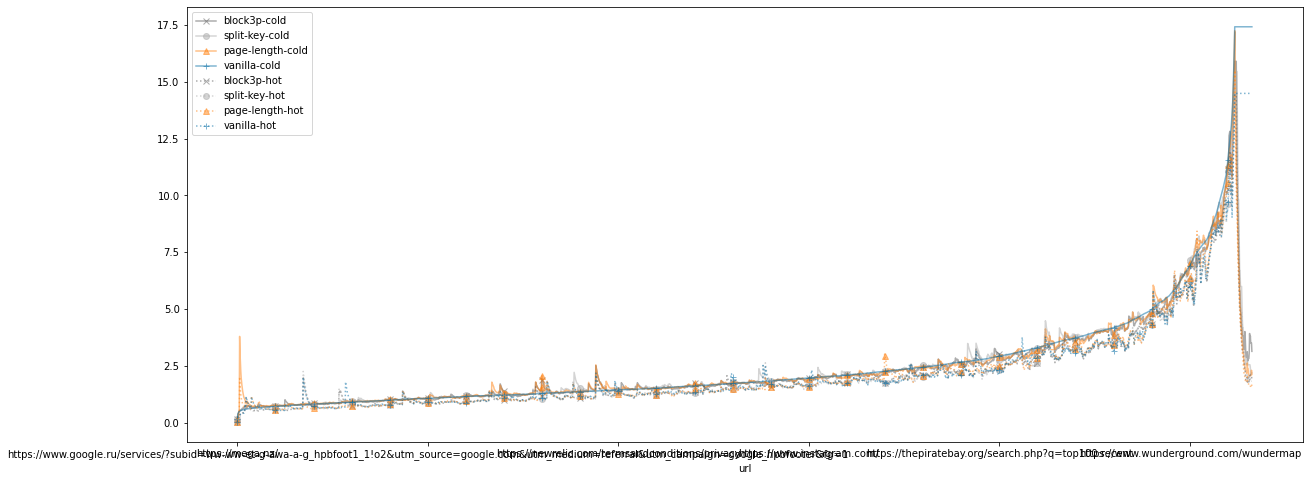

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
line_spec = [
    ('block3p-cold', COLORS[3], 'x', '-'),
    ('split-key-cold', COLORS[2], 'o', '-'),
    ('page-length-cold', COLORS[1], '^', '-'),
    ('vanilla-cold', COLORS[0], '+', '-'),
    ('block3p-hot', COLORS[3], 'x', ':'),
    ('split-key-hot', COLORS[2], 'o', ':'),
    ('page-length-hot', COLORS[1], '^', ':'),
    ('vanilla-hot', COLORS[0], '+', ':'),
]
for s, c, m, ls in line_spec:
    #smtdf[s].ewm(alpha=0.1).mean().plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)
    smtdf[s].plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)

In [85]:
t2df = metric_map['largestContentfulPaint']
mt2df = tdf.groupby(['url', 'pt']).seconds.median().unstack()
mt2df.insert(0, 'medsort', mt2df.transpose().median())
smt2df = mt2df.sort_values('medsort')


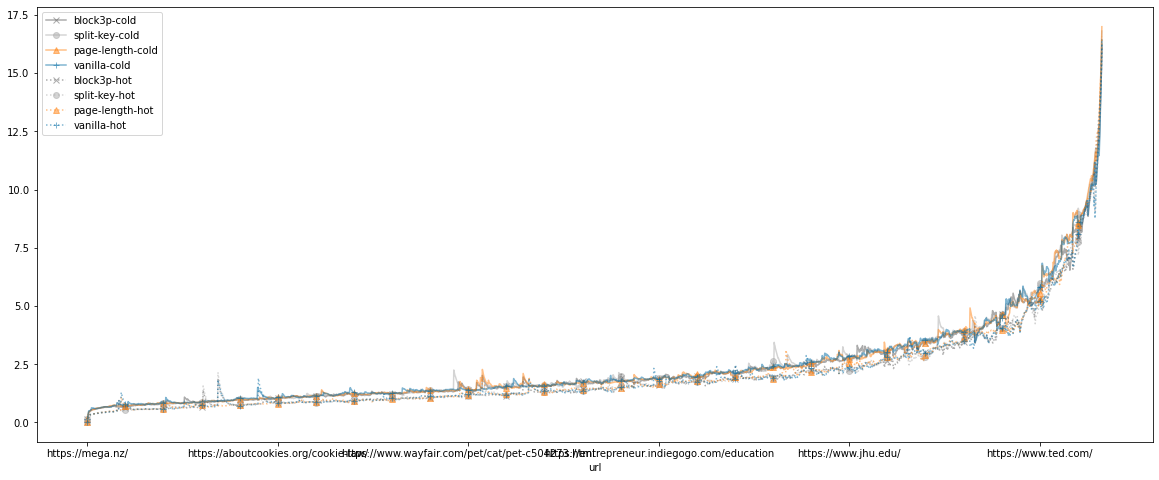

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
line_spec = [
    ('block3p-cold', COLORS[3], 'x', '-'),
    ('split-key-cold', COLORS[2], 'o', '-'),
    ('page-length-cold', COLORS[1], '^', '-'),
    ('vanilla-cold', COLORS[0], '+', '-'),
    ('block3p-hot', COLORS[3], 'x', ':'),
    ('split-key-hot', COLORS[2], 'o', ':'),
    ('page-length-hot', COLORS[1], '^', ':'),
    ('vanilla-hot', COLORS[0], '+', ':'),
]
for s, c, m, ls in line_spec:
    smt2df[s].ewm(alpha=0.1).mean().plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)
    #smt2df[s].plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)
